### Objective 1 - Dimensionality Reduction



In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("unique_m.csv")
df.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [7]:
print("Number of cells with value 0:", (df.to_numpy()==0).sum())
print("Number of cells:", np.prod(df.shape))
print(f"Ratio of cells with value 0: {(df.to_numpy()==0).sum()/np.prod(df.shape):.2f}%")

Number of cells with value 0: 1741116
Number of cells: 1871144
Ratio of cells with value 0: 0.93%


- Since the data is sparse we will use SVD for dimensionality reduction

In [10]:
import matplotlib.pyplot as plt

from scipy.sparse import dok_matrix
from scipy.sparse.linalg import svds

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(columns=["critical_temp", "material"]).to_numpy()
y = df.critical_temp

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

#### Check for dimensionality reduction with **No Scaling** VS **Scaling**

In [38]:
#X_temp = X_train
X_temp = StandardScaler().fit_transform(X_train)

In [39]:
s = np.linalg.svd(X_temp, compute_uv=False)

In [40]:
s_sqr_normed = (s**2) / (s**2).sum()

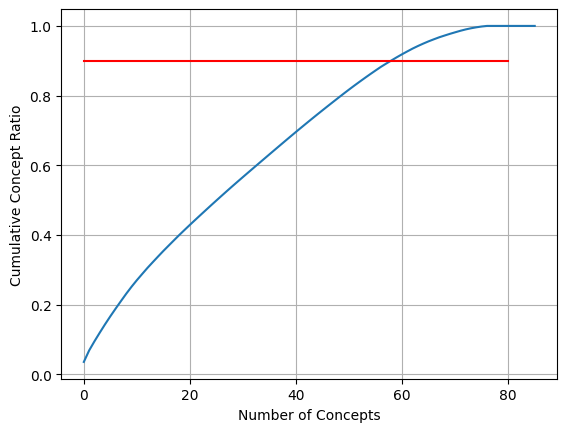

In [41]:
plt.plot(np.cumsum(s_sqr_normed))
plt.xlabel("Number of Concepts")
plt.ylabel("Cumulative Concept Ratio")
plt.grid()
plt.plot([0, 80], [0.9, 0.9], "r")

In [42]:
np.cumsum(s_sqr_normed)[:60]

array([0.03549455, 0.06833569, 0.09457429, 0.11940175, 0.14346306,
       0.16650902, 0.18863038, 0.21018363, 0.23138884, 0.25137907,
       0.27019187, 0.28788292, 0.30543951, 0.32188324, 0.33814645,
       0.35414643, 0.36950288, 0.38476346, 0.39993564, 0.41453744,
       0.42902673, 0.44324348, 0.45733528, 0.47132047, 0.48527521,
       0.49906054, 0.51276142, 0.52636218, 0.53981964, 0.55312376,
       0.56630421, 0.57942232, 0.59248286, 0.60552162, 0.61851313,
       0.63150189, 0.64446071, 0.65739311, 0.67027911, 0.68311897,
       0.69586975, 0.70847123, 0.72097505, 0.73343266, 0.74574033,
       0.75790318, 0.77001996, 0.7820118 , 0.79392416, 0.80578131,
       0.81742037, 0.82879009, 0.83992138, 0.85089251, 0.86164762,
       0.87214704, 0.88249712, 0.8919093 , 0.90101973, 0.91008889])

- We will reduce the data into 16 concepts - For no scaling
- We will reduce the data into 59 concepts - For Standard Scaling

In [43]:
#u, s, v = svds(X_temp, k=16)
u, s, v = svds(X_temp, k = 59)

In [44]:
u.shape, s.shape, v.shape

((19136, 59), (59,), (59, 86))

Since using scipy the concepts are sorted in reverse order we will use index $-1$ and $-2$, which are the 2 most strong concepts

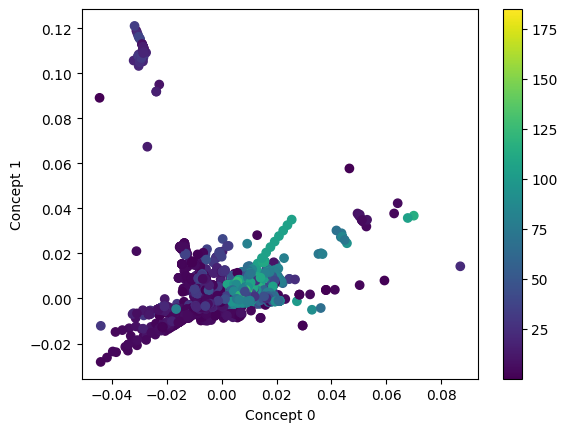

In [45]:
plt.scatter(u[:,-1], u[:, -2], c=y_train, label="critical_temp")
plt.xlabel("Concept 0")
plt.ylabel("Concept 1")
plt.colorbar()

We can see that most of the high values are upwards - for no scaling

With scaling the data is much more concentrated

### Objective 2 - Create a Regression and classification model

#### Make a Regression Model

Because of the non-linearity of the data we think that Decision Tree's are more appropriate

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, max_error

1. Without Standardization

In [ ]:
u, s, v = svds(X_train, k=16)

Average critical_temp= 34.488188417119574
RMSE = 40.262854175561664
Max. Error = 131.7


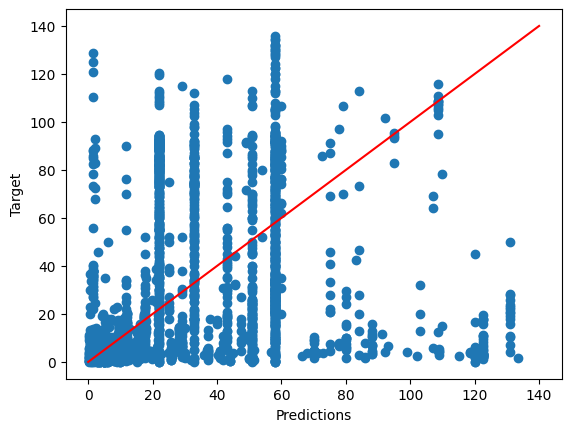

In [56]:
X_temp = u

model = DecisionTreeRegressor().fit(X_temp, y_train)
preds = model.predict(X_test @ v.T)

print("Average critical_temp=", y_train.mean())
print("RMSE =", mean_squared_error(y_test, preds, squared=False))
print("Max. Error =", max_error(y_test, preds))

plt.scatter(preds, y_test)
plt.xlabel("Predictions")
plt.ylabel("Target")

plt.plot([0,140], [0,140], "r")

2. With Standardization

In [ ]:
u, s, v = svds(X_train, k=59)

Average critical_temp= 34.488188417119574
RMSE = 38.32591650576878
Max. Error = 129.24


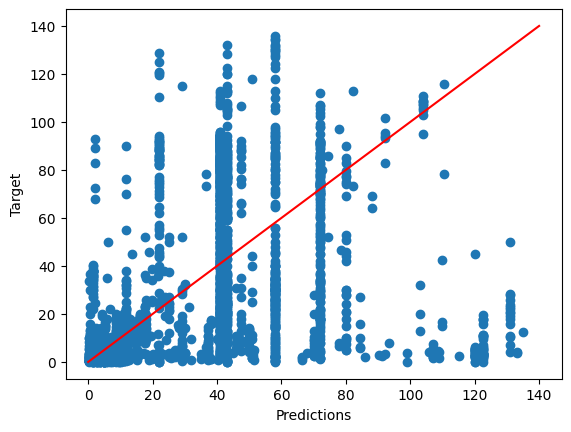

In [57]:
X_temp = u

model = Pipeline([
    ("scaler", StandardScaler()),
    ("predictor", DecisionTreeRegressor())
]).fit(X_temp, y_train)
preds = model.predict(X_test @ v.T)

print("Average critical_temp=", y_train.mean())
print("RMSE =", mean_squared_error(y_test, preds, squared=False))
print("Max. Error =", max_error(y_test, preds))

plt.scatter(preds, y_test)
plt.xlabel("Predictions")
plt.ylabel("Target")

plt.plot([0,140], [0,140], "r")

#### 2.2 - Create a Classification Model

In [58]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import matthews_corrcoef, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [59]:
def to_class(x: float) -> str:
    if 0 <= x < 1.0:
        return "VeryLow"
    elif 1 <= x < 5.0:
        return "Low"
    elif 5 <= x < 20.0:
        return "Medium"
    elif 20 <= x < 100.0:
        return "High"
    elif x >= 100:
        return "VeryHigh"
    return None

In [60]:
y_train_class = y_train.apply(lambda x: to_class(x))